# 결정트리(Decision Tree)

### 1. 결정트리

- 분류와 회귀 문제에 널리 사용하는 모델
- 결정트리는 결정에 다다르기 위해 질문을 이어나가면서 학습, 즉 결정을 내리기 위해 사용하는 사용하는 트리
- 계층구조로 이루어진 노드(node)와 에지(edge)들의 집합으로 구성
    - 노드는 내부노드(internal node)와 종단 노드(terminal node, leaf node)로 나뉨
    - 에지는 질문의 답과 다음 질문을 연결, 보통 두개의 에지를 갖는 것으로 가정

### 2. 결정트리 머신러닝

#### 1) 머신러닝 순서

- Define Problem
- Collect training data
- Extract Data
- Build a tree
- Deploy machine
- Test with test data

#### 2) 분류, 회귀 모델에서 결정트리의 머신러닝

- 머신러닝 관점에서 결정트리를 학습한다는 것은 정답에 가장 빨리 도달하는 질문 목록을 학습하는 것
    - 질문들을 테스트라고 부름
- 분류 모델에서는 각 분할된 영역이 한개의 타겟값을 가질때까지 반복
    - 순수 노드(pure node): 결정노드의 리프 노드가 타겟값 하나를 가질 때
- 회귀 모델에서는 테스트 결과에 따라 트리를 탐색해나가고 새로운 데이터 포인트에 해당되는 리프 노드를 찾음
    - 리프 노드의 training data 평균값이 데이터 포인트의 출력이 됨

### 3. ID3 알고리즘 수학적 접근

- ID3 알고리즘이 가장 유명
- Entropy, Information gain이라는 두가지 컨셉을 가지고 있음
- choose best feature to split: Highest information gain

#### 1) Entropy

$$Entropy = -p(+)*log(p(+)) - p(-)*log(p(-))$$

- +는 Problem에 해당하는 것, -는 아닌 것

#### 2) Information gain 

- information gain이 가장 높은 값을 속성으로 먼저 선택

### 4. 결정 트리 소스코드 구현

#### 1) 결정 트리의 복잡도

- 모든 리프 노드가 순수 노드가 될 때가지 학습을 진행하면 발생하는 문제
    - 모델이 매우 복잡해지고 training set에 overfitting되는 문제 발생
    - 순수 노드로 이뤄진 트리는 training set에 100% 정확하게 맞는다는 의미
- Overfitting 방지 방법: pre-pruning, post-pruning(pruning)
    - scikit-learn은 트리 생성을 일찍 중단하는 전략인 pre-pruning만 지원
        - 트리의 최대 깊이나 리프의 최대 개수를 제한(max_depth, max_leaf_nodes) 
        - 노드가 분할하기 위한 포인트의 최소 개수를 지정(min_samples_leaf)
    - post-pruning: 트리 생성 후 데이터 포인트가 적은 노드를 삭제하거나 병합하는 전략

#### 2) scikit-learn를 이용한 완전 결정 트리의 구현 

- scikit-learn의 DecisionTreeRegresor, DecisionTreeClassifier에 구현
- 유방암 데이터 셋 이용
- 완전 결정 트리: 모든 리프 노드가 순수 노드가 될때 까지 생성한 트리
- training set의 accuracy는 100%이나 test set의 accuracy는 떨어짐
    - 새로운 데이터에 대한 일반화가 되지 않음

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                   cancer.target,
                                                   stratify=cancer.target,
                                                   random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("train set accuracy {:.3f}".format(tree.score(X_train, y_train)))
print("test set accuracy {:.3f}".format(tree.score(X_test, y_test)))

train set accuracy 1.000
test set accuracy 0.937


#### 3) 결정 트리의 깊이 제한

- pre-puruning 이용: training set의 accuracy는 떨어지지만 test set의 accuracy 성능 개선

In [4]:
# max_depth: 결정 트리의 깊이를 지정
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("train set accuracy {:.3f}".format(tree.score(X_train, y_train)))
print("test set accuracy {:.3f}".format(tree.score(X_test, y_test)))

train set accuracy 0.988
test set accuracy 0.951


#### 4) 결정 트리의 시각화

- tree 모듈의 export_graphviz 함수를 이용해 트리 시각화
    - 그래프 저장용 텍스트 파일 .dot 파일 생성
    - filled=True 옵션: 다수인 클래스를 구분하기 위해 다른 색으로 표현

In [5]:
from sklearn.tree import export_graphviz

export_graphviz(tree, 
                out_file="./graph/tree.dot",
                class_names=["negative", "positive"],
                feature_names=cancer.feature_names,
                impurity=False,
                filled=True,
               rounded=3)

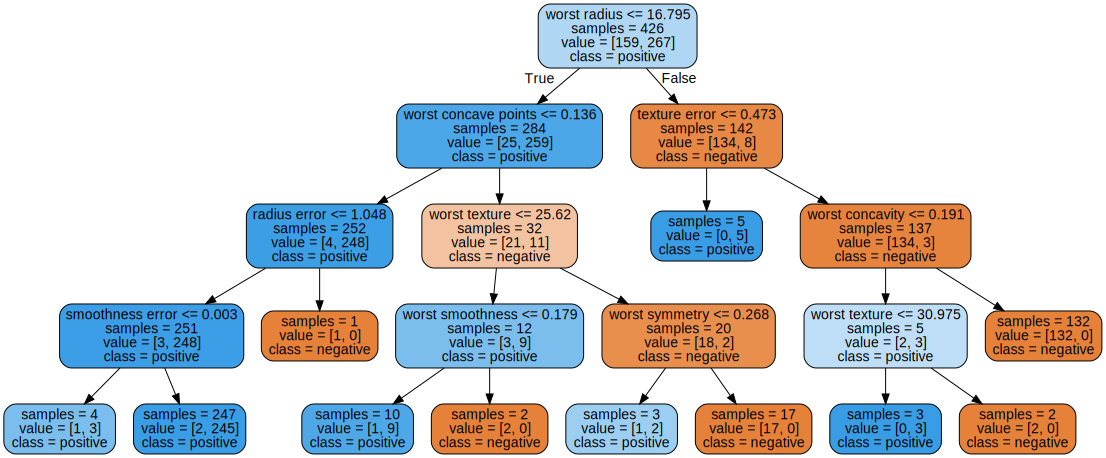

In [6]:
import graphviz

with open("./graph/tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

- 결정트리 분석
    - samples: 각 노드에 있는 샘플의 수
    - value 클래스당 샘플의 수

- 참고: mac에서 graphviz의 dot의 경로는 못 찾는 경우 해결방법
    - virtualenv 안에서는 pip install graphviz로 설치
    - 가상 환경이 아닌 곳에서 brew install graphviz로 설치
        - 설치 경로가 /usr/local/Cellar/graphviz/2.40.1/bin 이므로 system path에 직접 추가 하였으나 동작 안함
        - /usr/local/bin에 dot 파일을 심볼릭링크 생성 후 system path에 /usr/local/bin이 추가되도록 함

#### 5) 트리의 특성 중요도

- 특성 중요도(feature importance): 0과 1사이의 숫자, 전체의 합은 1, 항상 양수의 값을 가짐
    - 0: 각 feature가 전혀 사용되지 않음
    - 1: 완벽하게 타겟 클래스를 예측했음

In [7]:
print("feature importance: {} \n".format(tree.feature_importances_))

feature importance: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ] 



In [8]:
cancer.data.shape

(569, 30)

In [9]:
print(len(cancer.feature_names))
cancer.feature_names

30


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [33]:
import pandas as pd

df_cancer = pd.DataFrame(cancer.data)
df_cancer.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### 6) 특성 중요도의 시각화

- 특성 중 "worst radius"가 가장 중요한 지표로 나타났으나 악성인지 음성인지는 알수 없음

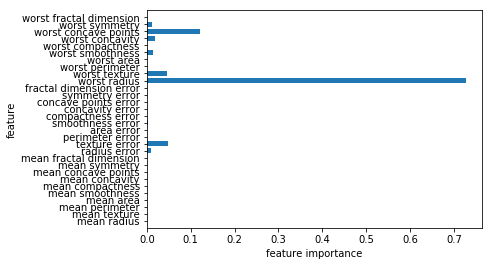

In [11]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

- 특성과 클래스의 관계 파악을 위한 예

Feature importances: [0. 1.]


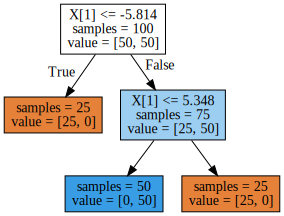

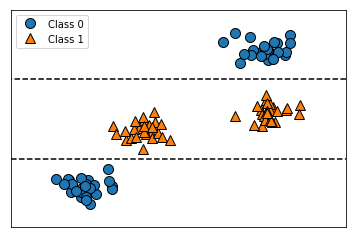

In [12]:
import mglearn

tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

- 두개의 특성과 클래스를 가진 데이터 셋
    - X[1]정보만 사용되었으며, X[0]은 사용되지 않음
    - 데이터와 출력 클래스와의 관계 없음

- 참고: mac에서 mglearn import시 imread import error 발생 해결 방법
    - 보통 pillow를 설치하지 않았을 때 발생하는 error로 pillow를 설치했음에도 오류 발생함
    - [pillow 홈페이지](https://pillow.readthedocs.io/en/5.1.x/installation.html)에서
    사용하는 OS의 Latest tested pillow 버전으로 지정하여 설치하여 문제 해결

#### 7) 회귀문제에 결정트리 사용

- 컴퓨터 메모리 가격 동향 데이터 셋을 이용한 예제
- DecisionTreeRegrssor의 문제
    - training data 범위 밖의 포인트에 대해서는 예측을 할 수 없음(외삽, extrapolation 이라고 함)

In [13]:
import pandas as pd
import os

print(mglearn.datasets.DATA_PATH)

ram_price = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
print(ram_price.shape)
ram_price.head()

/Users/eunguru/testall/lib/python3.6/site-packages/mglearn/data
(333, 3)


,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


- y축은 로그스케일 적용
    - 그래프를 로그 스케일로 비교적 선형적으로 나타나서 예측하기 쉬워짐

Text(0,0.5,'price ($/Mbyte)')

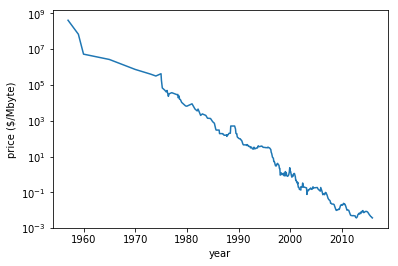

In [29]:
plt.semilogy(ram_price.date, ram_price.price)
plt.xlabel("year")
plt.ylabel("price ($/Mbyte)")

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# training set: 2000년 이전 
# test set: 2000년 이후
data_train = ram_price[ram_price.date < 2000]
data_test = ram_price[ram_price.date >= 2000]

print(data_train.shape)

# 가격 예측을 위해 data feature만 이용
X_train = data_train.date[:, np.newaxis]
print(X_train.shape)
# 데이터와 타겟의 관계를 간단하게 만들기 위해 로그스케일로 변환
y_train = np.log(data_train.price)

print(y_train.shape)

# 결정 트리 생성
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해 수행
X_all = ram_price.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

(202, 3)
(202, 1)
(202,)
411041792.0 19.83420545098937


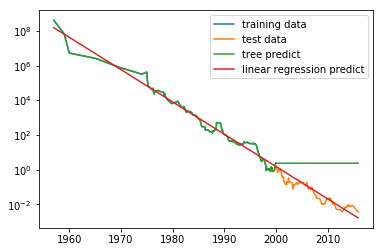

In [35]:
plt.semilogy(data_train.date, data_train.price, label="training data")
plt.semilogy(data_test.date, data_test.price, label="test data")
plt.semilogy(ram_price.date, price_tree, label="tree predict")
plt.semilogy(ram_price.date, price_lr, label="linear regression predict")
plt.legend()

### 5. 결정 트리의 장단점

- 장점
    - 만들어진 모델을 쉽게 시각화할 수 있어서 비전문가도 이해하시 쉬움
    - 데이터 스케일의 영향을 받지 않으므로 결정 트리에서는 특성의 정규화나 표준화 같은 전처리 과정이 필요없음
- 단점
    - pre-pruning을 함에도 overfitting되는 경황이 있어 일반화 성능이 좋지 않음